In [1]:
#Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import matplotlib.ticker as ticker

In [2]:
# API Key from EIA
api_key = '4Cgy5BurMNMAhbo0RBIu3s5FFyyo37QEVmW0uBoz'
# PADD Names to Label Columns
# Change to whatever column labels you want to use.
SERIES_NAMES = ['Brent']
# Enter all your Series IDs here separated by commas
SERIES_KEY = ['PET.RBRTE.D']
# Initialize list - this is the final list that you will store all the data from the json pull. Then you will use this list to concat into a pandas dataframe. 
final_data = []
# Choose start and end dates
startDate = '2016-01-01'
endDate = '2022-02-01'


# Pull in data via EIA API
for i in range(len(SERIES_KEY)):
    url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + SERIES_KEY[i]
    r = requests.get(url)
    json_data = r.json()
    
    if r.status_code == 200:
        print('Success!')
    else:
        print('Error')
    
    df = pd.DataFrame(json_data.get('series')[0].get('data'),
                      columns = ['Date', SERIES_NAMES[i]])
    df.set_index('Date', drop=True, inplace=True)
    final_data.append(df)

Success!


In [3]:
final_data[0]['Year']=final_data[0].index.astype(str).str[:4]
final_data[0]['Month']=final_data[0].index.astype(str).str[4:6]
final_data[0]['Day']=final_data[0].index.astype(str).str[6:]
final_data[0]['Date'] = pd.to_datetime(final_data[0][['Year','Month','Day']])
final_data[0].set_index('Date',drop=True,inplace=True)
final_data[0].sort_index(inplace=True)
final_data[0] = final_data[0][startDate:endDate]
final_data[0] = final_data[0].iloc[:,:5]

crude = pd.concat(final_data,axis=1)

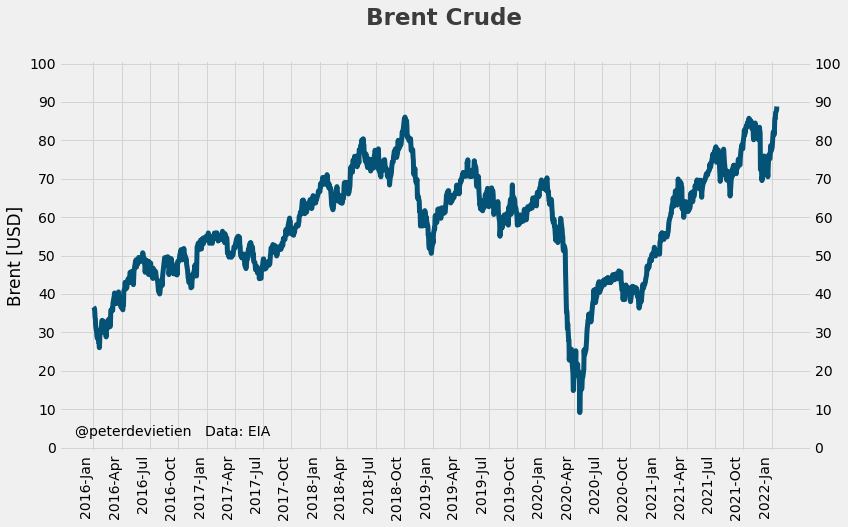

In [11]:


# Generating Colours and Style
colors = {'Brent':'#045275','TREND 1':'#DC3977','TREND 2':'#DC3977'}
plt.style.use('fivethirtyeight')


# Creating the Visualization
plot = crude.plot(figsize=(12,8), 
                  color=list(colors.values()), 
                  linewidth=5, 
                  legend=False)


plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_ylabel('Brent [USD]')
plot.set_yticks(range(0,120,10))
plot.set_ylim([-1,101])
plot.tick_params(labelright=True)

## Get x ticks with evenly spaced dates
datestart=datetime(2016,1,1)
dateend=datetime(2022,1,1)
xdates=[datestart]
while xdates[-1]<dateend:
    xdates.append(xdates[-1] + relativedelta(months=3))

xlabels=[]
for i in xdates:
    xlabels.append(i.strftime('%Y-%b'))

plot.set_xticks(xdates)
plot.set_xticklabels(xlabels,rotation='vertical')
""" 
a=plot.get_xaxis()
a.set_major_formatter(ticker.NullFormatter())
a.set_minor_locator(ticker.FixedLocator(xdates))
 """
##

#plot.set_xlim([date(2020,1,1),date(2022,6,1)])
plot.set_xlabel('')
#plot.legend({'OECD + non-OECD'},fontsize=22,loc='bottom right')
plot.text(x = date(2018,6,1), 
          y = 110, 
          s = "Brent Crude", 
          fontsize = 23, 
          weight = 'bold', 
          alpha = .75)
plot.text(x = date(2015,11,1), 
          y = 3,
          s = '@peterdevietien   Data: EIA', 
          fontsize = 14)

pngname='brent'
plt.savefig('/Users/peter/projects/oil/post/'+pngname)


In [5]:
#[for date(2020,1,1),date(2020,1,1) +relativedelta(months=3)]

k=range(0,120,20)
print(k[-1])

100
